In [ ]:
+import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
import random
import prettytable

In [ ]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import shapiro
from scipy.stats import normaltest

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import os # accessing directory structure
import matplotlib.pyplot as mp

import seaborn as sb
# test classification dataset
from sklearn.datasets import make_classification

# test regression dataset
from sklearn.datasets import make_regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# path copied = /content/drive/MyDrive/train.csv
training_data = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
testing_data = pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
training_data.shape

(2392, 15)

In [ ]:
testing_data.shape

NameError: name 'testing_data' is not defined

In [ ]:
training_data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
null_check = pd.isnull(training_data["Age"])
null_team_data = training_data[null_check]

In [ ]:
missing_values_count = null_check.sum()
print("Count of missing values in the 'Team' column:", missing_values_count)

Count of missing values in the 'Team' column: 0


In [ ]:
#missing values
print('#missing values')
print(training_data.isnull().sum())
#total missing values
print('total missing values')
print(training_data.isnull().sum().sum())
# missing values percentage
print('missing values percentage')
print(training_data.isnull().sum()*100/len(training_data))

#missing values
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64
total missing values
0
missing values percentage
StudentID            0.0
Age                  0.0
Gender               0.0
Ethnicity            0.0
ParentalEducation    0.0
StudyTimeWeekly      0.0
Absences             0.0
Tutoring             0.0
ParentalSupport      0.0
Extracurricular      0.0
Sports               0.0
Music                0.0
Volunteering         0.0
GPA                  0.0
GradeClass           0.0
dtype: float64


In [ ]:
training_data.tail()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0
2391,3392,16,1,0,2,17.819907,13,0,2,0,0,0,1,2.140014,1.0


In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [ ]:
training_data.nunique()

StudentID            2392
Age                     4
Gender                  2
Ethnicity               4
ParentalEducation       5
StudyTimeWeekly      2392
Absences               30
Tutoring                2
ParentalSupport         5
Extracurricular         2
Sports                  2
Music                   2
Volunteering            2
GPA                  2371
GradeClass              5
dtype: int64

In [ ]:
training_data.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [ ]:
(training_data.isnull().sum()/(len(training_data)))*100

StudentID            0.0
Age                  0.0
Gender               0.0
Ethnicity            0.0
ParentalEducation    0.0
StudyTimeWeekly      0.0
Absences             0.0
Tutoring             0.0
ParentalSupport      0.0
Extracurricular      0.0
Sports               0.0
Music                0.0
Volunteering         0.0
GPA                  0.0
GradeClass           0.0
dtype: float64

In [ ]:
#Exploratory

In [ ]:
training_data.describe().T

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
training_data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
#mean of the popullation
mean_pop = training_data["Absences"].mean()
std_pop = training_data["Absences"].std()
print("μ and σ of overall purchases are {} and {} units respectively.".format(round(mean_pop,2),round(std_pop,2)))

μ and σ of overall purchases are 14.54 and 8.47 units respectively.


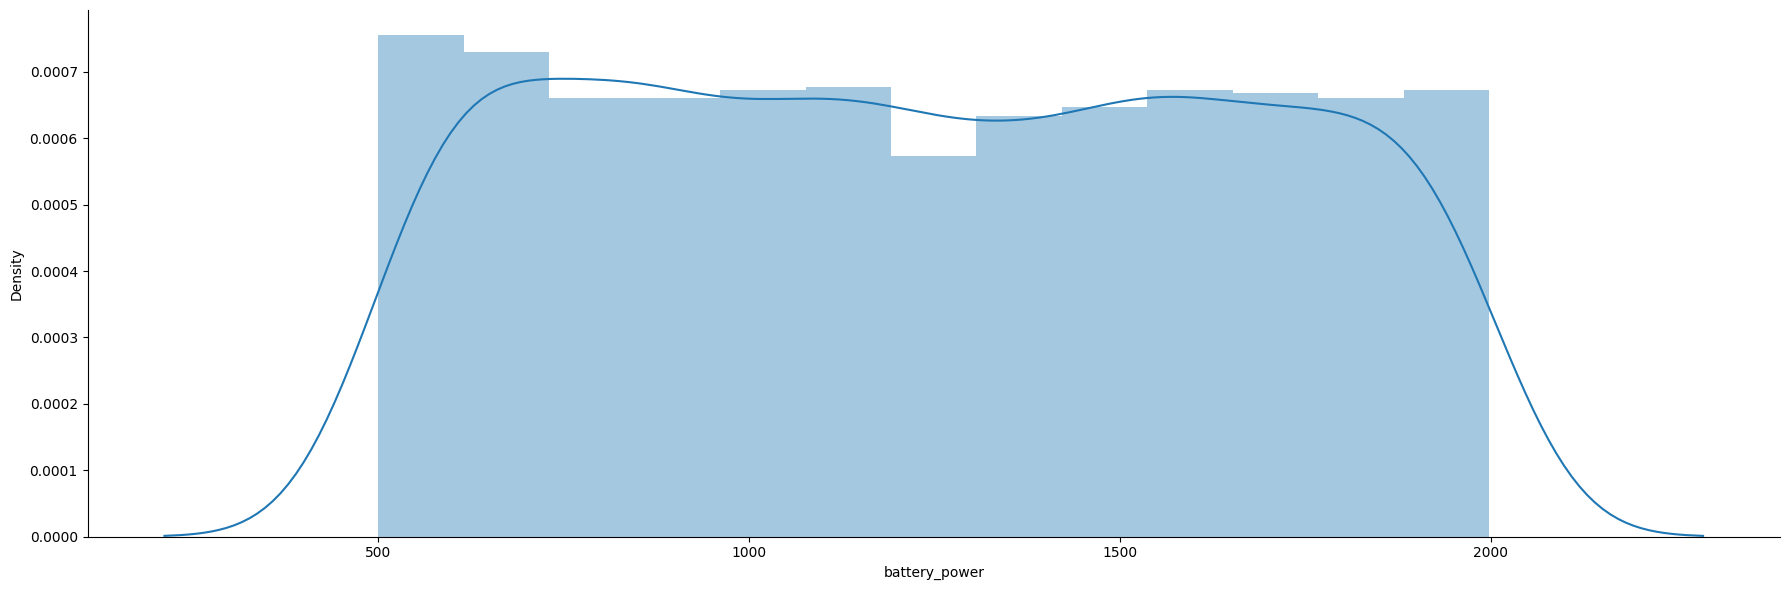

In [ ]:
sns.FacetGrid(training_data,height=6,aspect=3).map(sns.distplot,"battery_power")
plt.show()

In [ ]:
def sample_mean_distribution(data, samples_count, data_points_count):
    #list to append all samples
    samples_list = list()
    #data in array
    data = np.array(data.values)
    for i in range(0, samples_count):
        samples = random.sample(range(0, data.shape[0]), data_points_count)
        samples_list.append(data[samples].mean())
    #return array of sample mean
    return np.array(samples_list)

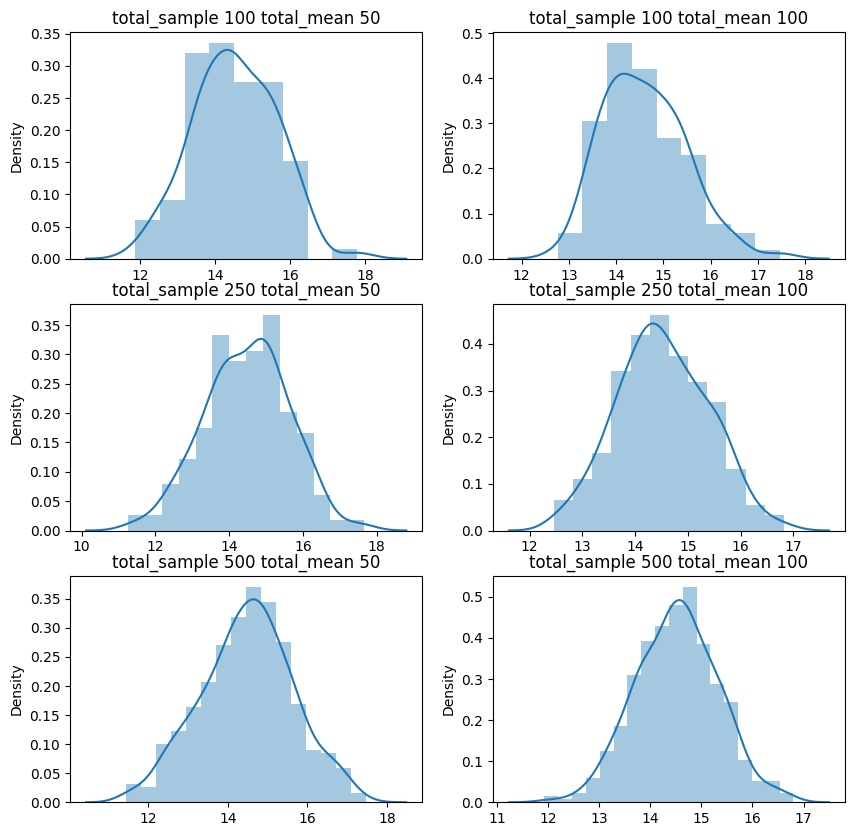

In [ ]:
cnt = 0
sample_mean = list()
#setting figures
fg, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
#list of samples and datapoints combinations
lst = [(100,50),(100,100),(250,50),(250,100),(500,50),(500,100)]
for i in range(0,3):
    for j in range(0,2):
        ax[i,j].set_title("total_sample " + str(lst[cnt][0]) + " total_mean " + str(lst[cnt][1]))
        sns.distplot(sample_mean_distribution(training_data["Absences"], lst[cnt][0],lst[cnt][1]),ax = ax[i,j])
        sample_mean.append(sample_mean_distribution(training_data["Absences"], lst[cnt][0],lst[cnt][1]))
        cnt +=1

In [ ]:
#calculating output
def sample_output(data, population_mean, population_sd,total_sample_points_list):
    df = pd.DataFrame()
    mean_sample = list(); std_sample = list(); std_approx = list(); strings_list = list()
    pop_mean = list(); pop_std = list()
    #calculating sample values
    for idx, val in enumerate(data):
        pop_mean.append(round(population_mean,2))
        pop_std.append(round(population_sd,2))
        mean_sample.append(round(val.mean(),2))
        std_sample.append(round(val.std(),2))
        std_approx.append(round(population_sd/np.sqrt((total_sample_points_list[idx][1])),2))
        strings_list.append("total_sample_" + str(total_sample_points_list[idx][0]) + "_total_mean_"
                            + str(total_sample_points_list[idx][1]))
    df["name"] = pd.Series(strings_list); df["battery_Power_mean"] = pd.Series(pop_mean)
    df["sample_mean"] = pd.Series(mean_sample); df["battery_Power_std"] = pd.Series(pop_std)
    df["sample_std"] = pd.Series(std_sample); df["battery_Power_approx_std"] = pd.Series(std_approx)

    return df

In [ ]:
output_df = sample_output(sample_mean, mean_pop, std_pop,lst)
output_df

,name,battery_Power_mean,sample_mean,battery_Power_std,sample_std,battery_Power_approx_std
0,total_sample_100_total_mean_50,14.54,14.50,8.47,1.31,1.20
1,total_sample_100_total_mean_100,14.54,14.50,8.47,0.86,0.85
2,total_sample_250_total_mean_50,14.54,14.57,8.47,1.17,1.20
3,total_sample_250_total_mean_100,14.54,14.55,8.47,0.88,0.85
4,total_sample_500_total_mean_50,14.54,14.46,8.47,1.19,1.20
5,total_sample_500_total_mean_100,14.54,14.52,8.47,0.79,0.85


In [ ]:
ptable = prettytable.PrettyTable(["sample_mean"+u"\u2248"+"orig_mean", "sample_std"+u"\u2248"+"approx_std"])
for i in range(0, len(output_df)):
    row = list()
    row.append(str(output_df["sample_mean"][i])+u"\u2248"+str(output_df["battery_Power_mean"][i]))
    row.append(str(output_df["sample_std"][i])+u"\u2248"+str(output_df["battery_Power_approx_std"][i]))
    ptable.add_row(row)
print(ptable)

+-----------------------+-----------------------+
| sample_mean≈orig_mean | sample_std≈approx_std |
+-----------------------+-----------------------+
|       14.5≈14.54      |        1.31≈1.2       |
|       14.5≈14.54      |       0.86≈0.85       |
|      14.57≈14.54      |        1.17≈1.2       |
|      14.55≈14.54      |       0.88≈0.85       |
|      14.46≈14.54      |        1.19≈1.2       |
|      14.52≈14.54      |       0.79≈0.85       |
+-----------------------+-----------------------+


In [ ]:
"""getting lower and upper limit of 95% confidence interval with known standard deviation of population"""
lower_lim = list(); upper_lim = list()
for i in range(0,len(output_df)):
    lower_limit = output_df["sample_mean"][i] - ((output_df["battery_Power_approx_std"][i])*1.96); lower_lim.append(round(lower_limit,2))
    upper_limit = output_df["sample_mean"][i] + ((output_df["battery_Power_approx_std"][i])*1.96); upper_lim.append(round(upper_limit,2))

#appending values into the dataset
output_df["lower_limit"] = pd.Series(lower_lim)
output_df["upper_limit"] = pd.Series(upper_lim)

In [ ]:
output_df

,name,battery_Power_mean,sample_mean,battery_Power_std,sample_std,battery_Power_approx_std,lower_limit,upper_limit
0,total_sample_100_total_mean_50,1238.52,1240.66,439.42,64.95,62.14,1118.87,1362.45
1,total_sample_100_total_mean_100,1238.52,1236.95,439.42,34.67,43.94,1150.83,1323.07
2,total_sample_250_total_mean_50,1238.52,1240.82,439.42,63.16,62.14,1119.03,1362.61
3,total_sample_250_total_mean_100,1238.52,1234.60,439.42,43.78,43.94,1148.48,1320.72
4,total_sample_500_total_mean_50,1238.52,1236.83,439.42,60.73,62.14,1115.04,1358.62
5,total_sample_500_total_mean_100,1238.52,1237.88,439.42,42.32,43.94,1151.76,1324.00


In [ ]:
"""getting lower and upper limit of 95% confidence interval without standard deviation of population"""
lower_lim = list(); upper_lim = list()
for i in range(0,len(output_df)):
    lower_limit = output_df["sample_mean"][i] - ((output_df["sample_std"][i]/np.sqrt((lst[i][1])))*1.96); lower_lim.append(round(lower_limit,2))
    upper_limit = output_df["sample_mean"][i] + ((output_df["sample_std"][i]/np.sqrt((lst[i][1])))*1.96); upper_lim.append(round(upper_limit,2))
#appending values into the dataset
output_df["lower_limit_wt_sd"] = pd.Series(lower_lim)
output_df["upper_limit_wt_sd"] = pd.Series(upper_lim)

In [ ]:
output_df

,name,battery_Power_mean,sample_mean,battery_Power_std,sample_std,battery_Power_approx_std,lower_limit,upper_limit,lower_limit_wt_sd,upper_limit_wt_sd
0,total_sample_100_total_mean_50,14.54,14.50,8.47,1.31,1.20,12.15,16.85,14.14,14.86
1,total_sample_100_total_mean_100,14.54,14.50,8.47,0.86,0.85,12.83,16.17,14.33,14.67
2,total_sample_250_total_mean_50,14.54,14.57,8.47,1.17,1.20,12.22,16.92,14.25,14.89
3,total_sample_250_total_mean_100,14.54,14.55,8.47,0.88,0.85,12.88,16.22,14.38,14.72
4,total_sample_500_total_mean_50,14.54,14.46,8.47,1.19,1.20,12.11,16.81,14.13,14.79
5,total_sample_500_total_mean_100,14.54,14.52,8.47,0.79,0.85,12.85,16.19,14.37,14.67


In [ ]:
"""getting lower and upper limit of 95% confidence interval without standard deviation of population"""
lower_lim = list(); upper_lim = list()
for i in range(0,len(output_df)):
    lower_limit = output_df["sample_mean"][i] - ((output_df["sample_std"][i]/np.sqrt((lst[i][1])))*2.576)
    lower_lim.append(round(lower_limit,2))
    upper_limit = output_df["sample_mean"][i] + ((output_df["sample_std"][i]/np.sqrt((lst[i][1])))*2.576)
    upper_lim.append(round(upper_limit,2))
#appending values into the dataset
output_df["lower_limit_99"] = pd.Series(lower_lim)
output_df["upper_limit_99"] = pd.Series(upper_lim)

In [ ]:
output_df

,name,battery_Power_mean,sample_mean,battery_Power_std,sample_std,battery_Power_approx_std,lower_limit,upper_limit,lower_limit_wt_sd,upper_limit_wt_sd,lower_limit_99,upper_limit_99
0,total_sample_100_total_mean_50,14.54,14.50,8.47,1.31,1.20,12.15,16.85,14.14,14.86,14.02,14.98
1,total_sample_100_total_mean_100,14.54,14.50,8.47,0.86,0.85,12.83,16.17,14.33,14.67,14.28,14.72
2,total_sample_250_total_mean_50,14.54,14.57,8.47,1.17,1.20,12.22,16.92,14.25,14.89,14.14,15.00
3,total_sample_250_total_mean_100,14.54,14.55,8.47,0.88,0.85,12.88,16.22,14.38,14.72,14.32,14.78
4,total_sample_500_total_mean_50,14.54,14.46,8.47,1.19,1.20,12.11,16.81,14.13,14.79,14.03,14.89
5,total_sample_500_total_mean_100,14.54,14.52,8.47,0.79,0.85,12.85,16.19,14.37,14.67,14.32,14.72


Histogram of Price Range


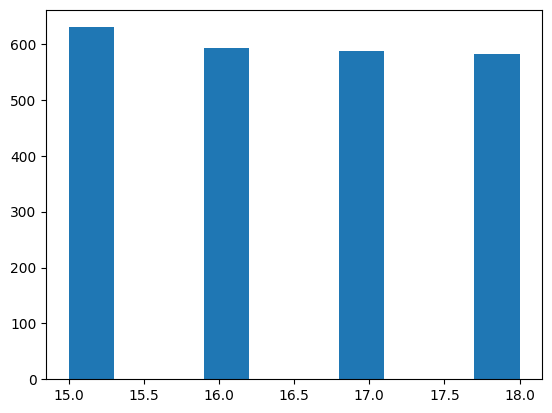

In [ ]:
print ('Histogram of Price Range')
pyplot.hist(training_data['Age'])
pyplot.show()

Histogram of Price Range


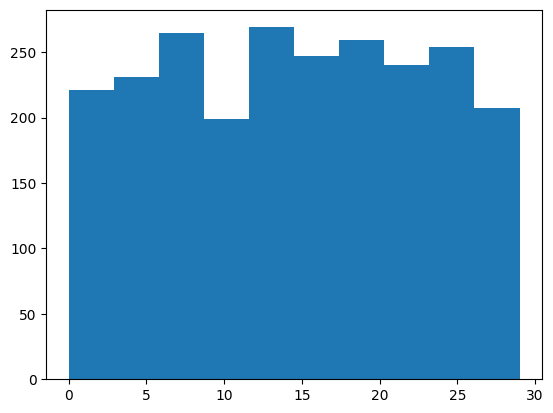

In [ ]:
print ('Histogram of Price Range')
pyplot.hist(training_data['Absences'])
pyplot.show()

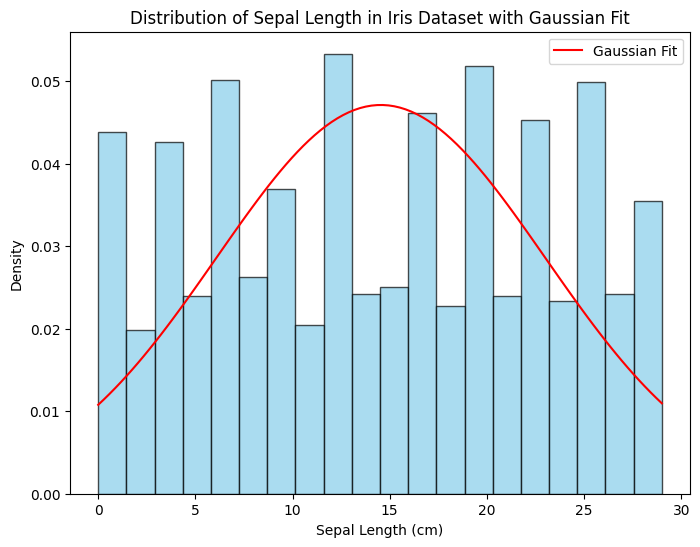

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

clock_speed = training_data['Absences']

mu, std = np.mean(clock_speed), np.std(clock_speed)
x = np.linspace(np.min(clock_speed), np.max(clock_speed), 100)
y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std)**2)

plt.figure(figsize=(8, 6))
plt.hist(clock_speed, bins=20, color='skyblue', edgecolor='black', alpha=0.7, density=True)
plt.plot(x, y, color='red', label='Gaussian Fit')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Density')
plt.title('Distribution of Sepal Length in Iris Dataset with Gaussian Fit')
plt.legend()
plt.show()

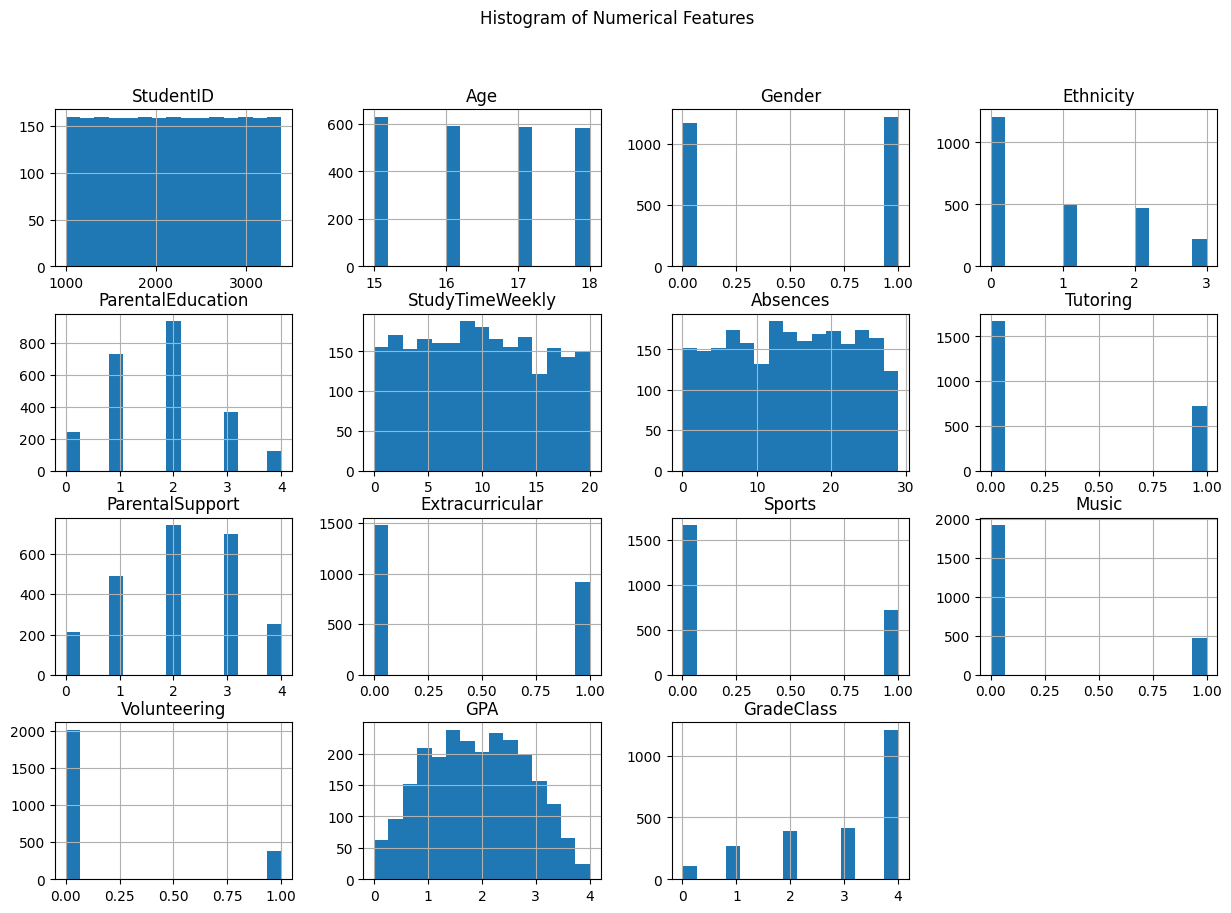

In [ ]:
# Histogram of numerical features
training_data.hist(bins=15, figsize=(15, 10))
plt.suptitle("Histogram of Numerical Features")
plt.show()

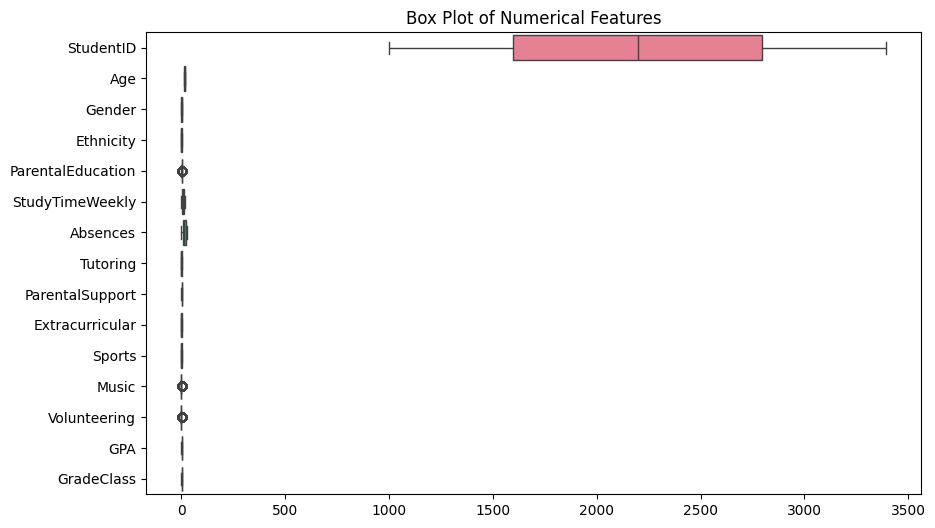

In [ ]:
# Box plot to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=training_data, orient="h")
plt.title("Box Plot of Numerical Features")
plt.show()

In [ ]:
# Detect outliers using the IQR method
Q1 = training_data.quantile(0.25)
Q3 = training_data.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
data_outliers_removed = training_data[~((training_data < (Q1 - 1.5 * IQR)) | (training_data > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f'Number of rows before removing outliers: {training_data.shape[0]}')
print(f'Number of rows after removing outliers: {data_outliers_removed.shape[0]}')

Number of rows before removing outliers: 2392
Number of rows after removing outliers: 1552


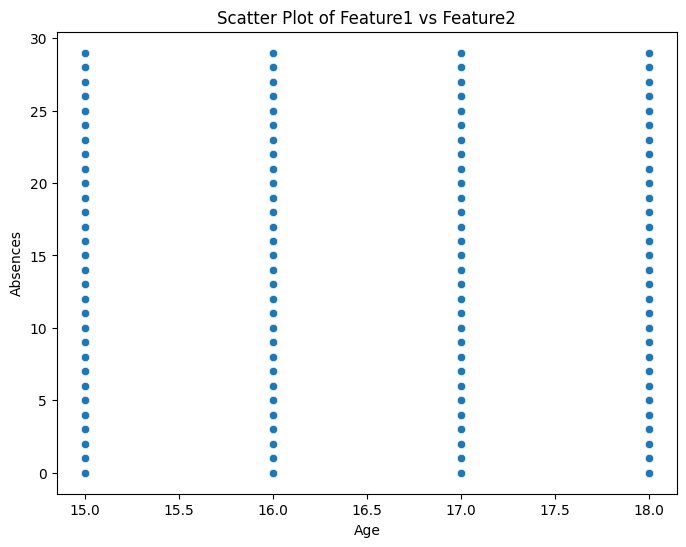

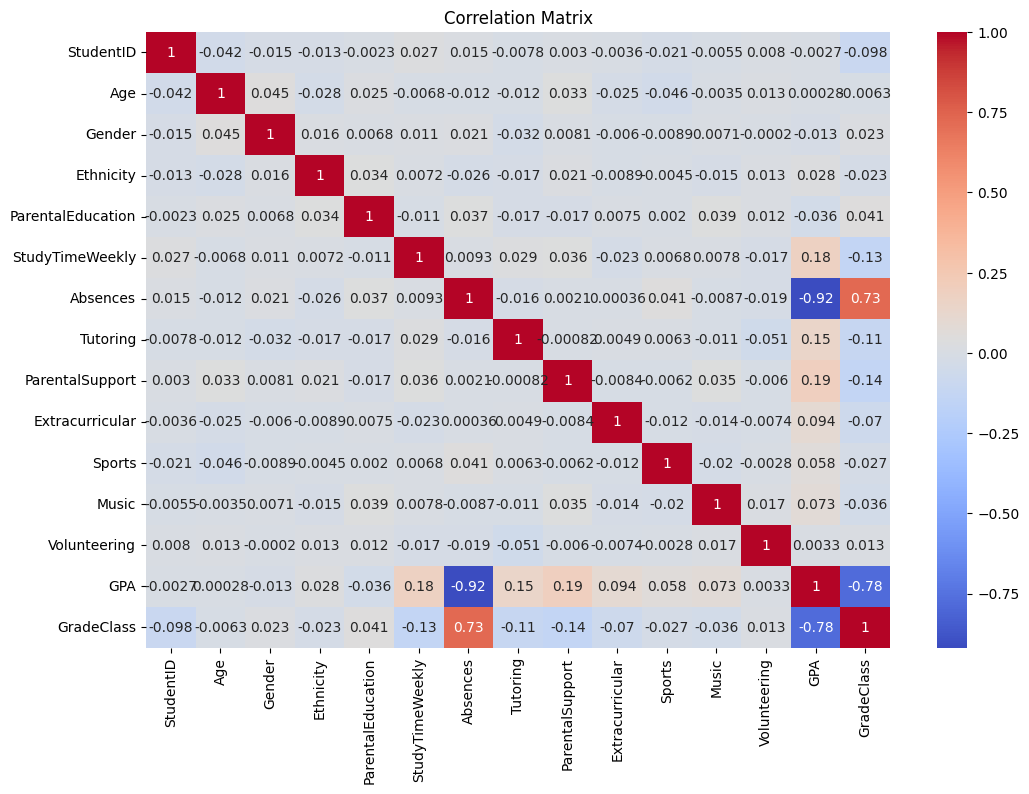

In [ ]:
# Scatter plot for two numerical variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=training_data, x='Age', y='Absences')
plt.title('Scatter Plot of Feature1 vs Feature2')
plt.show()

# Correlation matrix
correlation_matrix = training_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
for col in num_cols:
    print(col)
    print('Skew :', round(training_data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    training_data[col].hist(grid=False)
    plt.ylabel('light')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=training_data[col])
    plt.show()

NameError: name 'num_cols' is not defined

In [ ]:
# colors
facies_colors = ['xkcd:goldenrod', 'xkcd:orange','xkcd:sienna','xkcd:violet',
       'xkcd:olive','xkcd:turquoise', "xkcd:yellowgreen", 'xkcd:indigo', 'xkcd:blue']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh',
                 'MS',  'WS', 'D','PS', 'BS']
#facies_color_map is a dictionary that maps facies labels to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]
#establish facies label str
df.loc[:,'FaciesLabels'] = df.apply(lambda row: label_facies(row, facies_labels), axis=1)

NameError: name 'df' is not defined

In [ ]:
training_data.corr()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,1.000000,-0.042255,-0.014625,-0.012990,-0.002307,0.026976,0.014841,-0.007834,0.003016,-0.003611,-0.020703,-0.005468,0.008011,-0.002697,-0.098500
Age,-0.042255,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,-0.014625,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.012990,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,-0.002307,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,0.026976,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,0.014841,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.007834,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.003016,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.003611,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733


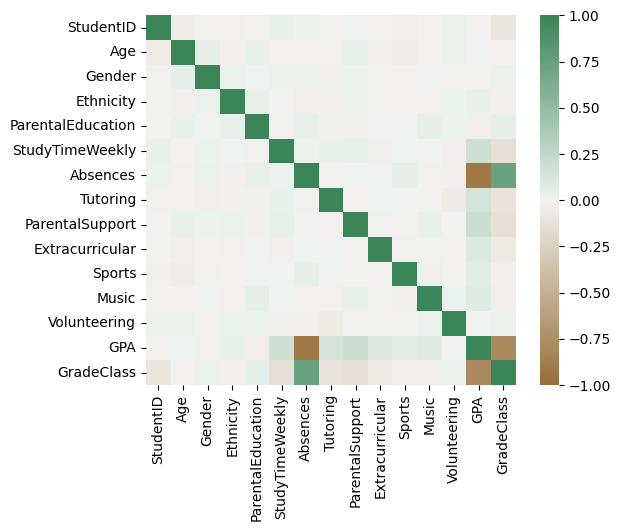

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns

correlation_full_health = training_data.corr()

axis_corr = sns.heatmap(
correlation_full_health,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

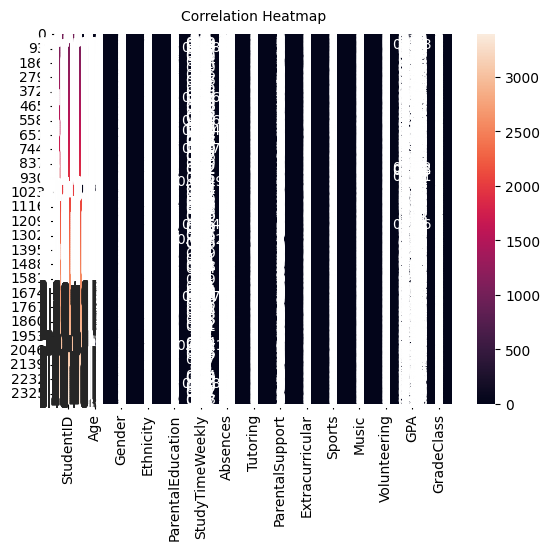

In [ ]:
heatmap = sns.heatmap(training_data, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=10)

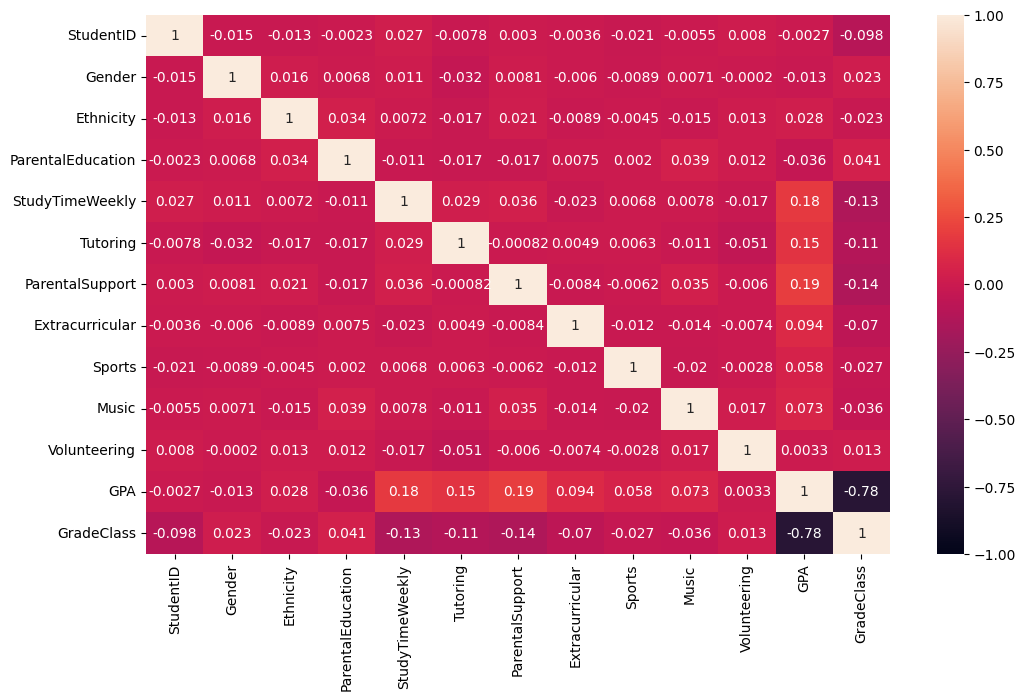

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(training_data.drop(['Age','Absences'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

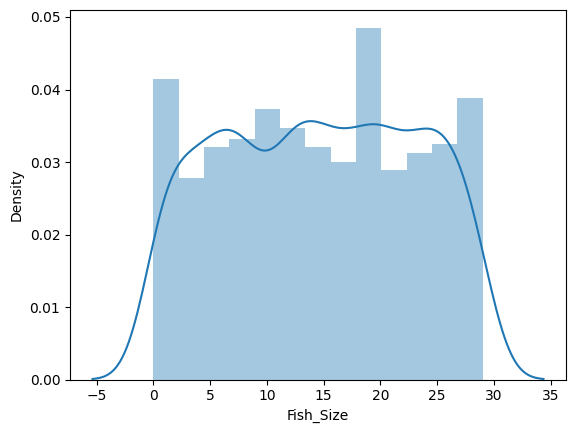

In [ ]:

sns.distplot(training_data["Absences"], axlabel="Fish_Size");


<Figure size 1300x1700 with 0 Axes>

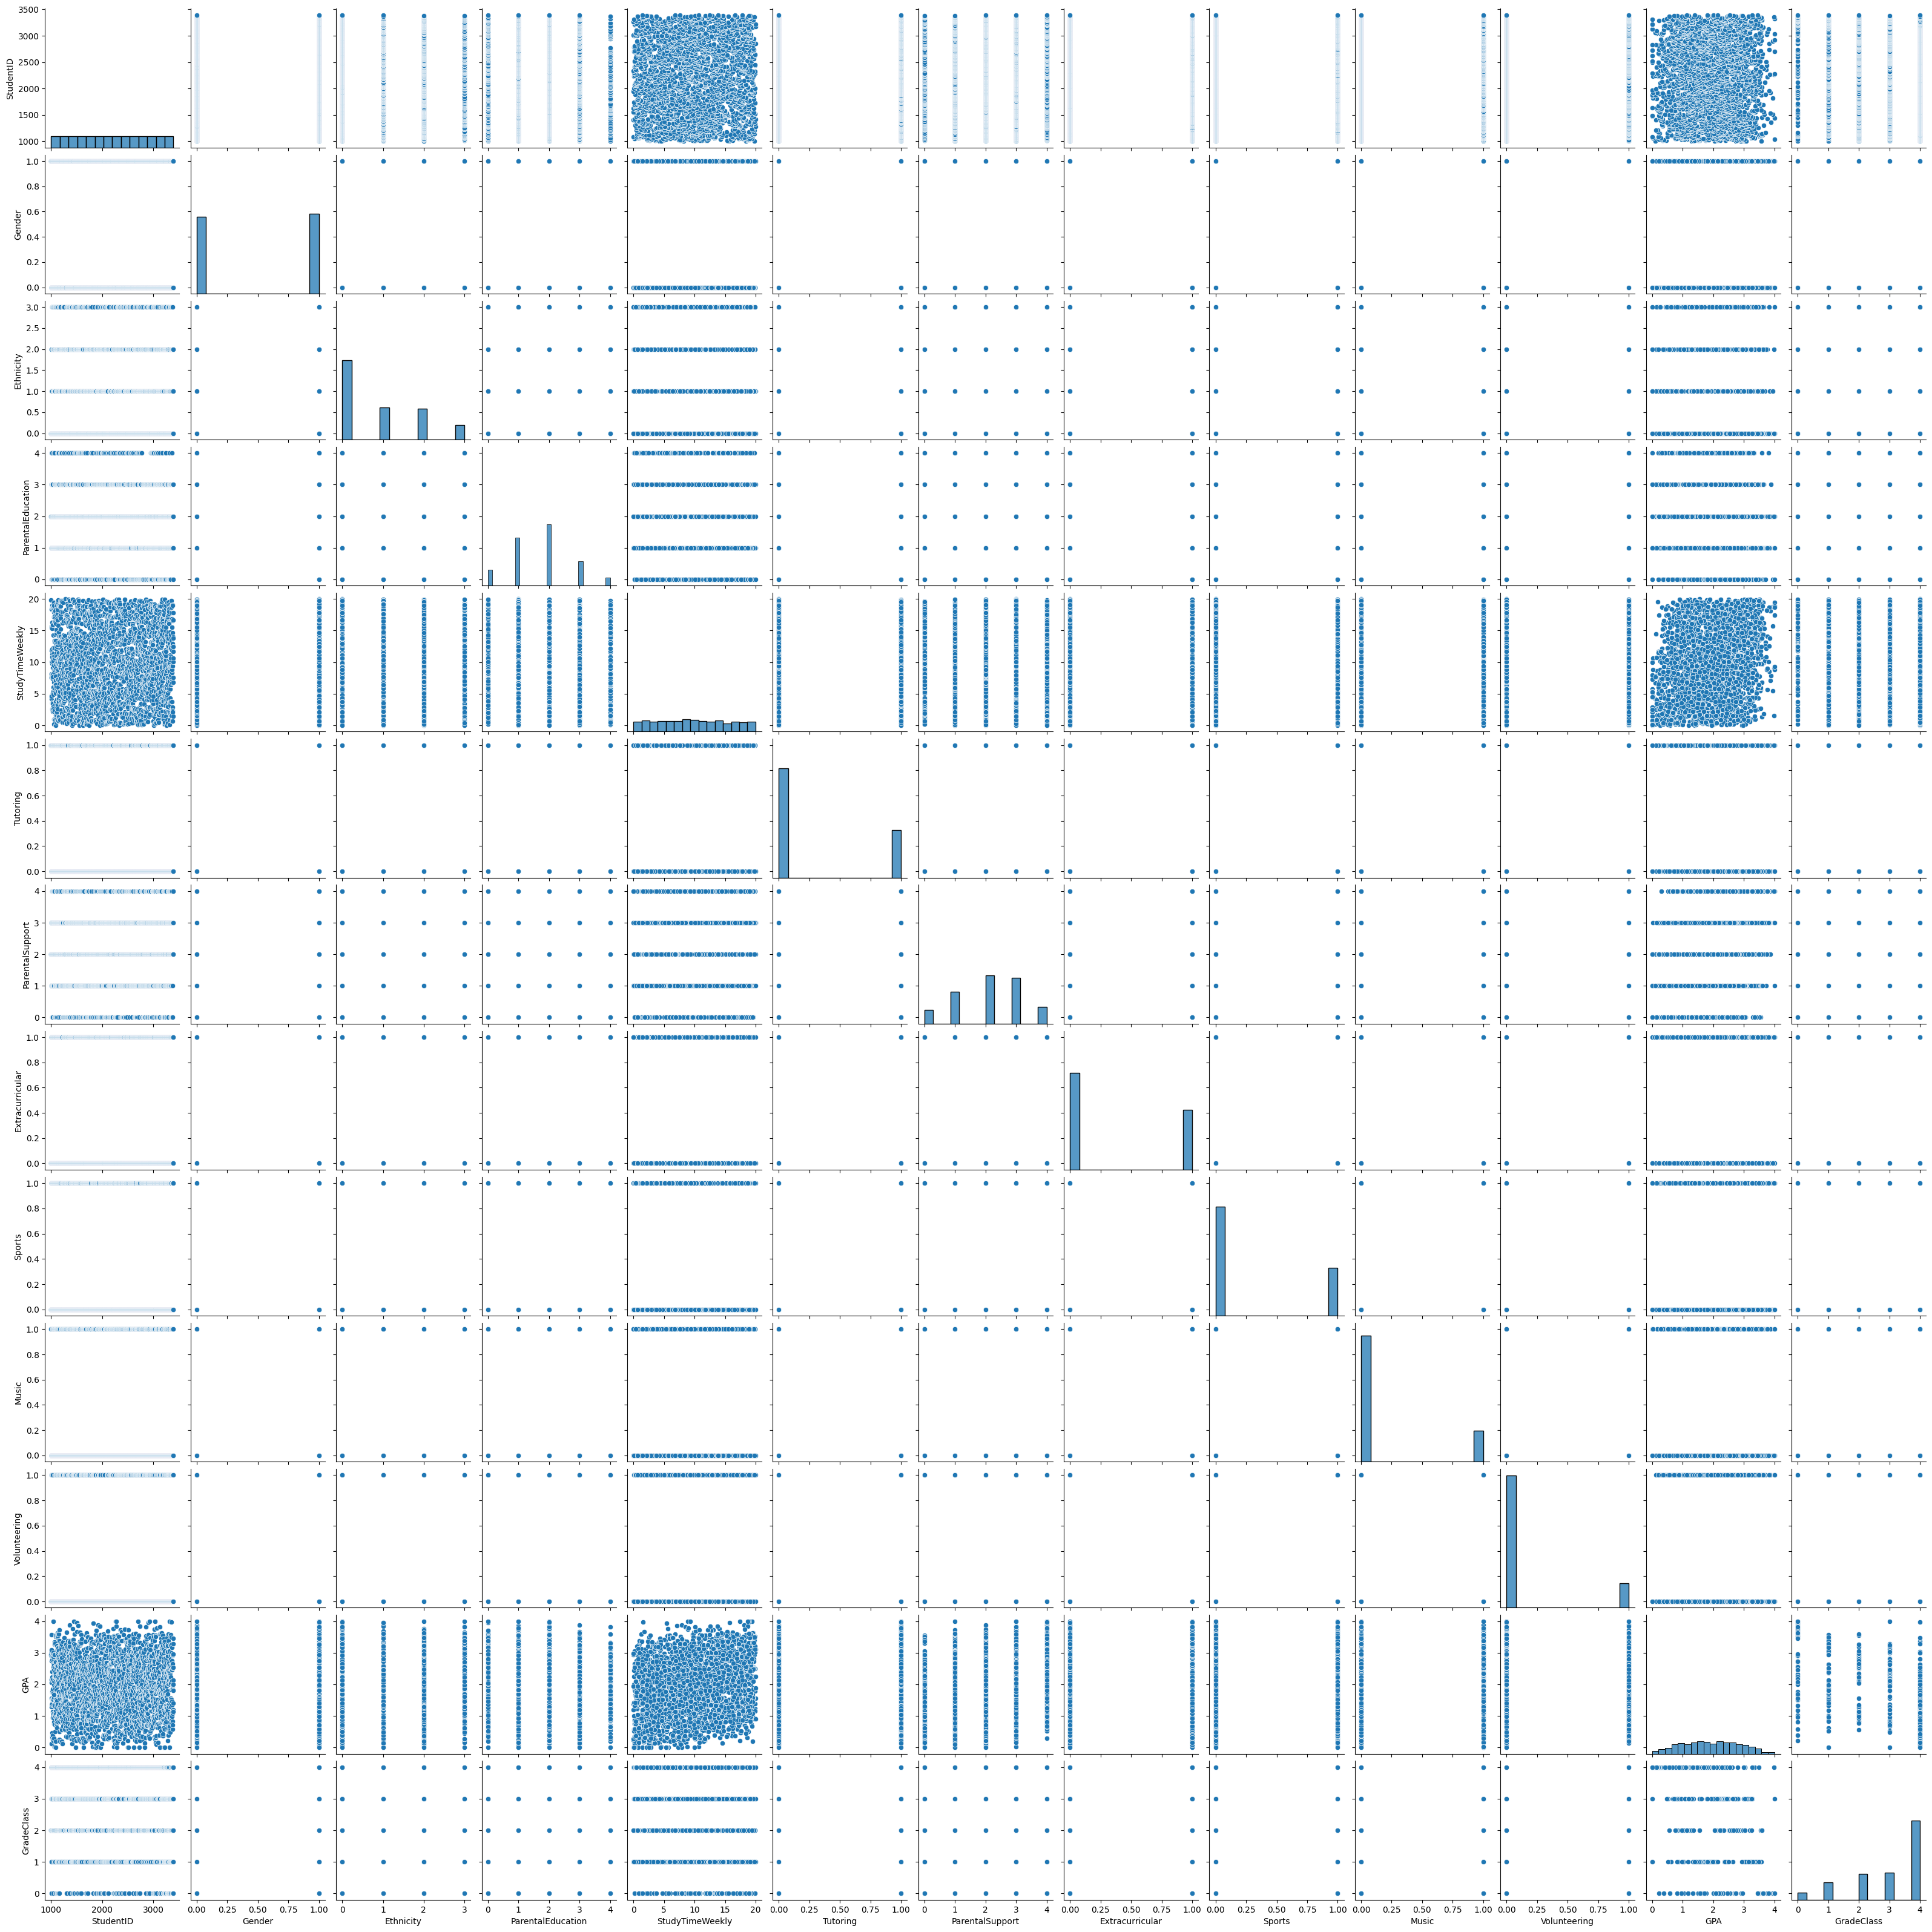

In [ ]:
plt.figure(figsize=(13,17))
sns.pairplot(data=training_data.drop(['Absences','Age'],axis=1))
plt.show()